# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [ ]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OrdinalEncoder

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi

# **Loading the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Overview**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/SuperKart.csv')
df = data.copy()

In [ ]:
df.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [ ]:
df['Price_per_Gram'] = df['Product_MRP'] / df['Product_Weight']

In [ ]:
df['Product_Code'] = df['Product_Id'].str[:2]
print("Created feature 'Product_Code'")

Created feature 'Product_Code'


In [ ]:
current_year = 2025  # Assuming the current year for calculating age
df['Store_Age'] = current_year - df['Store_Establishment_Year']
print("Created feature 'Store_Age'")

Created feature 'Store_Age'


In [ ]:
df['Product_Type'].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods',
       'Health and Hygiene', 'Snack Foods', 'Meat', 'Household',
       'Hard Drinks', 'Fruits and Vegetables', 'Breads', 'Soft Drinks',
       'Breakfast', 'Others', 'Starchy Foods', 'Seafood'], dtype=object)

In [ ]:
product_mapping = {'Frozen Foods': 'Frozen',
                   'Dairy': 'Dairy & Eggs',
                   'Canned': 'Pantry Staples',
                   'Baking Goods': 'Baking & Grains',
                   'Health and Hygiene': 'Non-Food',
                   'Snack Foods': 'Snacks',
                   'Meat': 'Meat & Seafood',
                   'Household': 'Non-Food',
                   'Hard Drinks': 'Beverages',
                   'Fruits and Vegetables': 'Produce',
                   'Breads': 'Baking & Grains',
                   'Soft Drinks': 'Beverages',
                   'Breakfast': 'Breakfast',
                   'Others': 'Miscellaneous',
                   'Starchy Foods': 'Pantry Staples',
                   'Seafood': 'Meat & Seafood'}

df['Product_Category'] = df['Product_Type'].map(product_mapping)
print("Created feature 'Product_Category' with updated mapping")
print(df[['Product_Type', 'Product_Category']].head())

Created feature 'Product_Category' with updated mapping
         Product_Type Product_Category
0        Frozen Foods           Frozen
1               Dairy     Dairy & Eggs
2              Canned   Pantry Staples
3        Baking Goods  Baking & Grains
4  Health and Hygiene         Non-Food


In [ ]:
df.drop(['Product_Id', 'Store_Id', 'Product_Type', 'Store_Establishment_Year'], axis=1, inplace=True)

In [ ]:
cat_cols = []
num_cols = []
for col in df.columns:
  if df[col].dtype == 'object':
    cat_cols.append(col)
  else:
    num_cols.append(col)

In [ ]:
df[num_cols].describe() # Select the numerical columns from the DataFrame before calling describe

,Product_Weight,Product_Allocated_Area,Product_MRP,Product_Store_Sales_Total,Price_per_Gram,Store_Age
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,12.653792,0.068786,147.032539,3464.003640,11.764863,22.967249
std,2.217320,0.048204,30.694110,1065.630494,2.330487,8.388381
min,4.000000,0.004000,31.000000,33.000000,3.444444,16.000000
25%,11.150000,0.031000,126.160000,2761.715000,10.206775,16.000000
50%,12.660000,0.056000,146.740000,3452.340000,11.596165,16.000000
75%,14.180000,0.096000,167.585000,4145.165000,13.142119,27.000000
max,22.000000,0.298000,266.000000,8000.000000,26.840156,38.000000


In [ ]:
df[cat_cols].describe()

,Product_Sugar_Content,Store_Size,Store_Location_City_Type,Store_Type,Product_Code,Product_Category
count,8763,8763,8763,8763,8763,8763
unique,4,3,3,4,3,11
top,Low Sugar,Medium,Tier 2,Supermarket Type2,FD,Non-Food
freq,4885,6025,6262,4676,6539,1368


Numerical Columns:
Product_Weight: Ranges from 4.0 to 22.0 grams; average ~12.65g.
Product_Allocated_Area: Small values (0.004 to 0.298); mean ~0.0688.
Product_MRP: Price varies widely (₹31 to ₹266); average ~₹147.
Product_Store_Sales_Total: Sales range from ₹33 to ₹8000; average ~₹3464.
Price_per_Gram: From ₹3.44 to ₹26.84 per gram; average ~₹11.76.
Store_Age: Stores range from 16 to 38 years old; median age is 16.
Categorical Columns:
Product_Sugar_Content: 4 unique levels; most common is Low Sugar.
Store_Size: 3 types; Medium is most frequent.
Store_Location_City_Type: 3 types; Tier 2 dominates.
Store_Type: 4 types; Supermarket Type2 is most frequent.
Product_Code: 3 codes; FD is the most common.
Product_Category: 11 categories; Non-Food is the top one.

In [ ]:
df.isnull().sum()

,0
Product_Weight,0
Product_Sugar_Content,0
Product_Allocated_Area,0
Product_MRP,0
Store_Size,0
Store_Location_City_Type,0
Store_Type,0
Product_Store_Sales_Total,0
Price_per_Gram,0
Product_Code,0


In [ ]:
df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

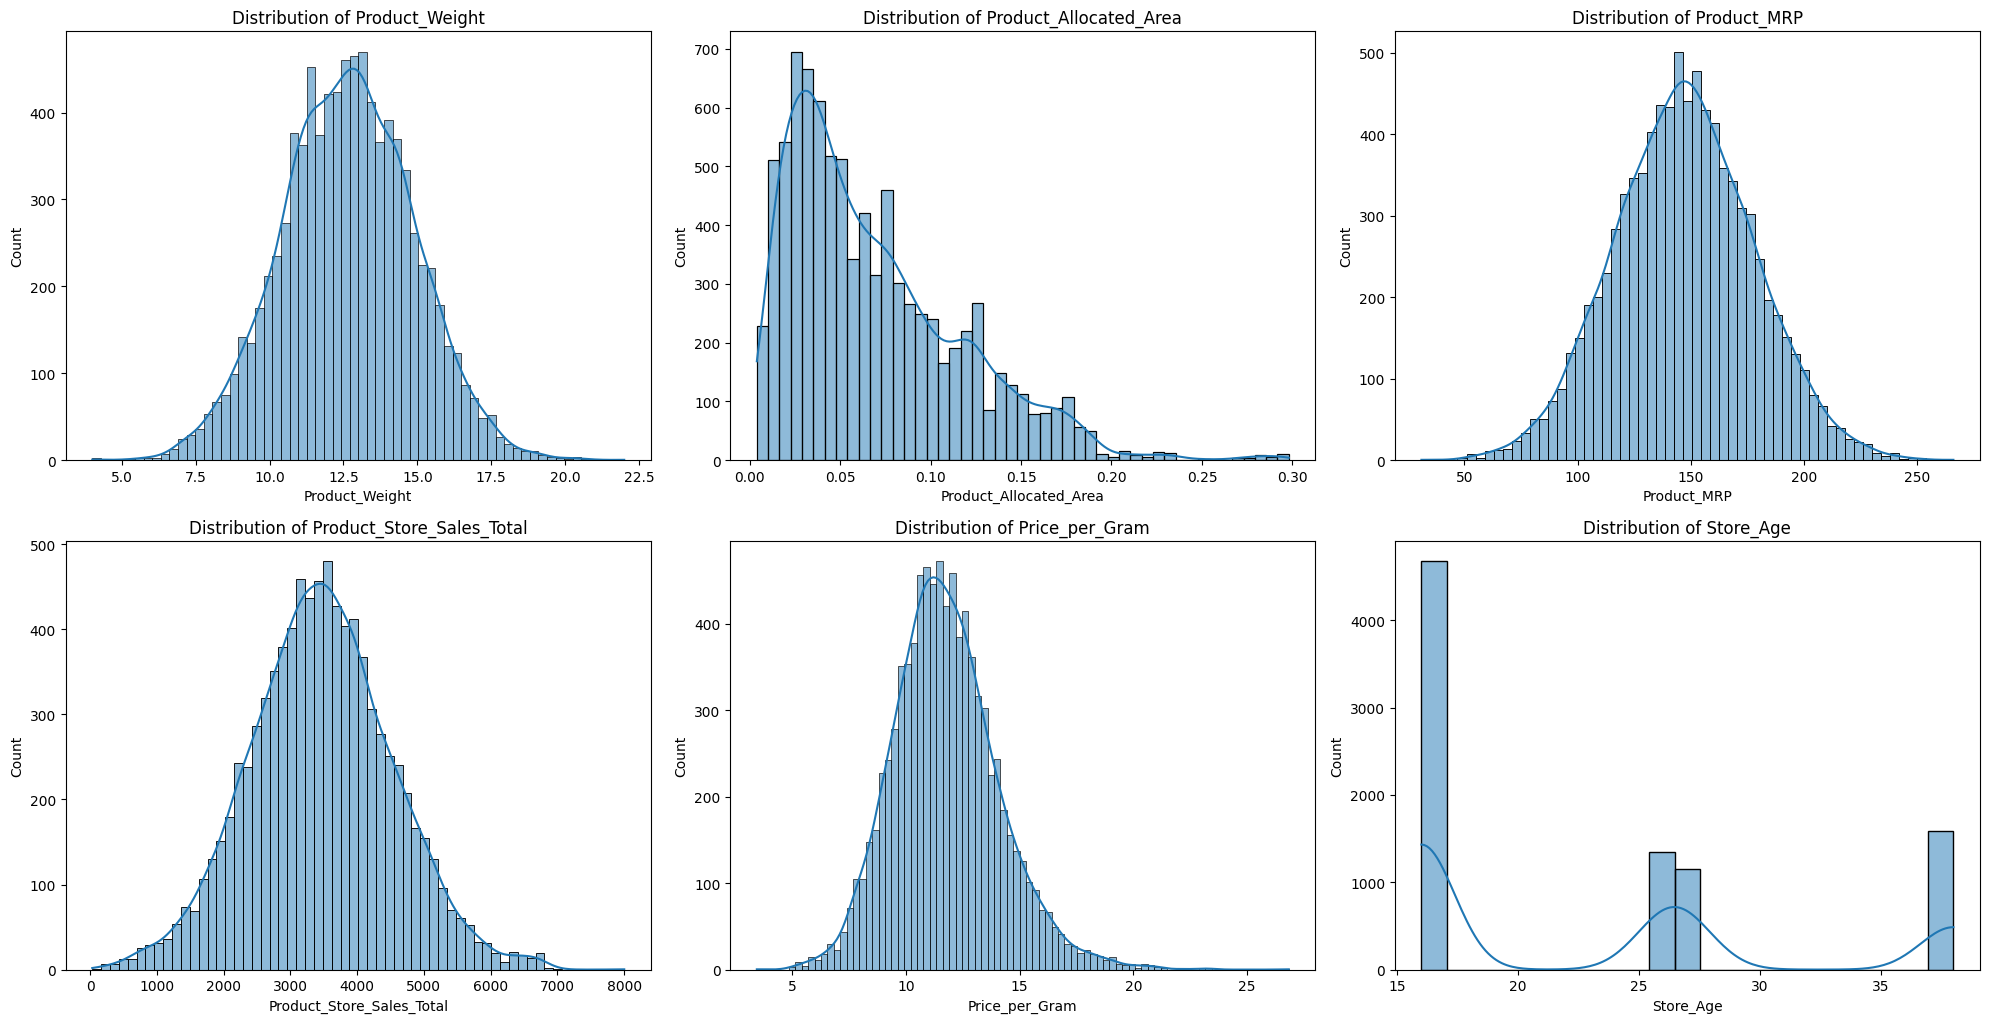

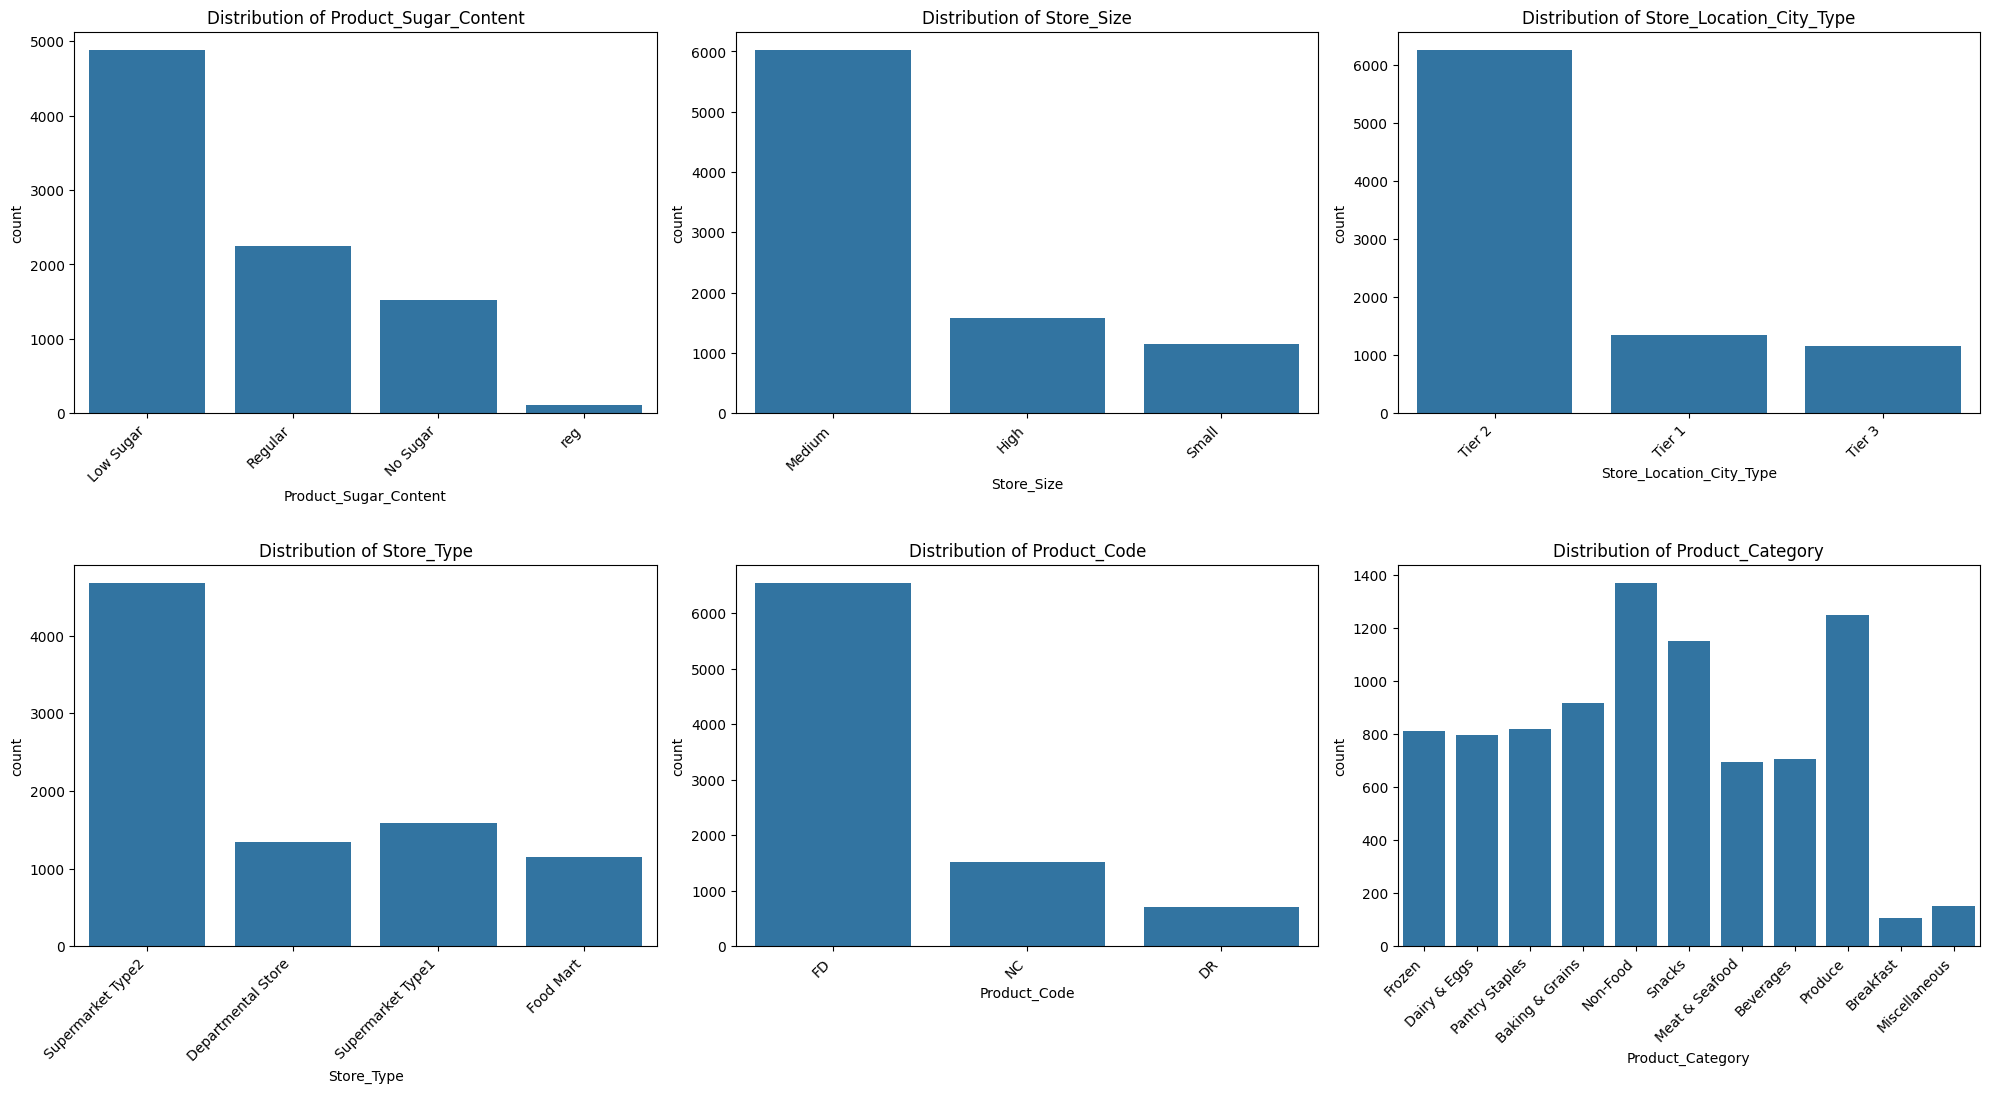

In [ ]:
# Plotting histograms for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Plotting countplots for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


### observations

product weight, product_MRP, sales are normally distributed where as product allocated area is heavily right skewed. Product_MRP has outliers. store establishment tells many are established between 2005 and 2010.Low sugar products are quite more when compared to other products.fruits,vegetables and snack foods are high in demand when compared to breakfast and seafoods. Medium stores are a hit with tier 2 location.


## Observations :


## Bivariate Analysis

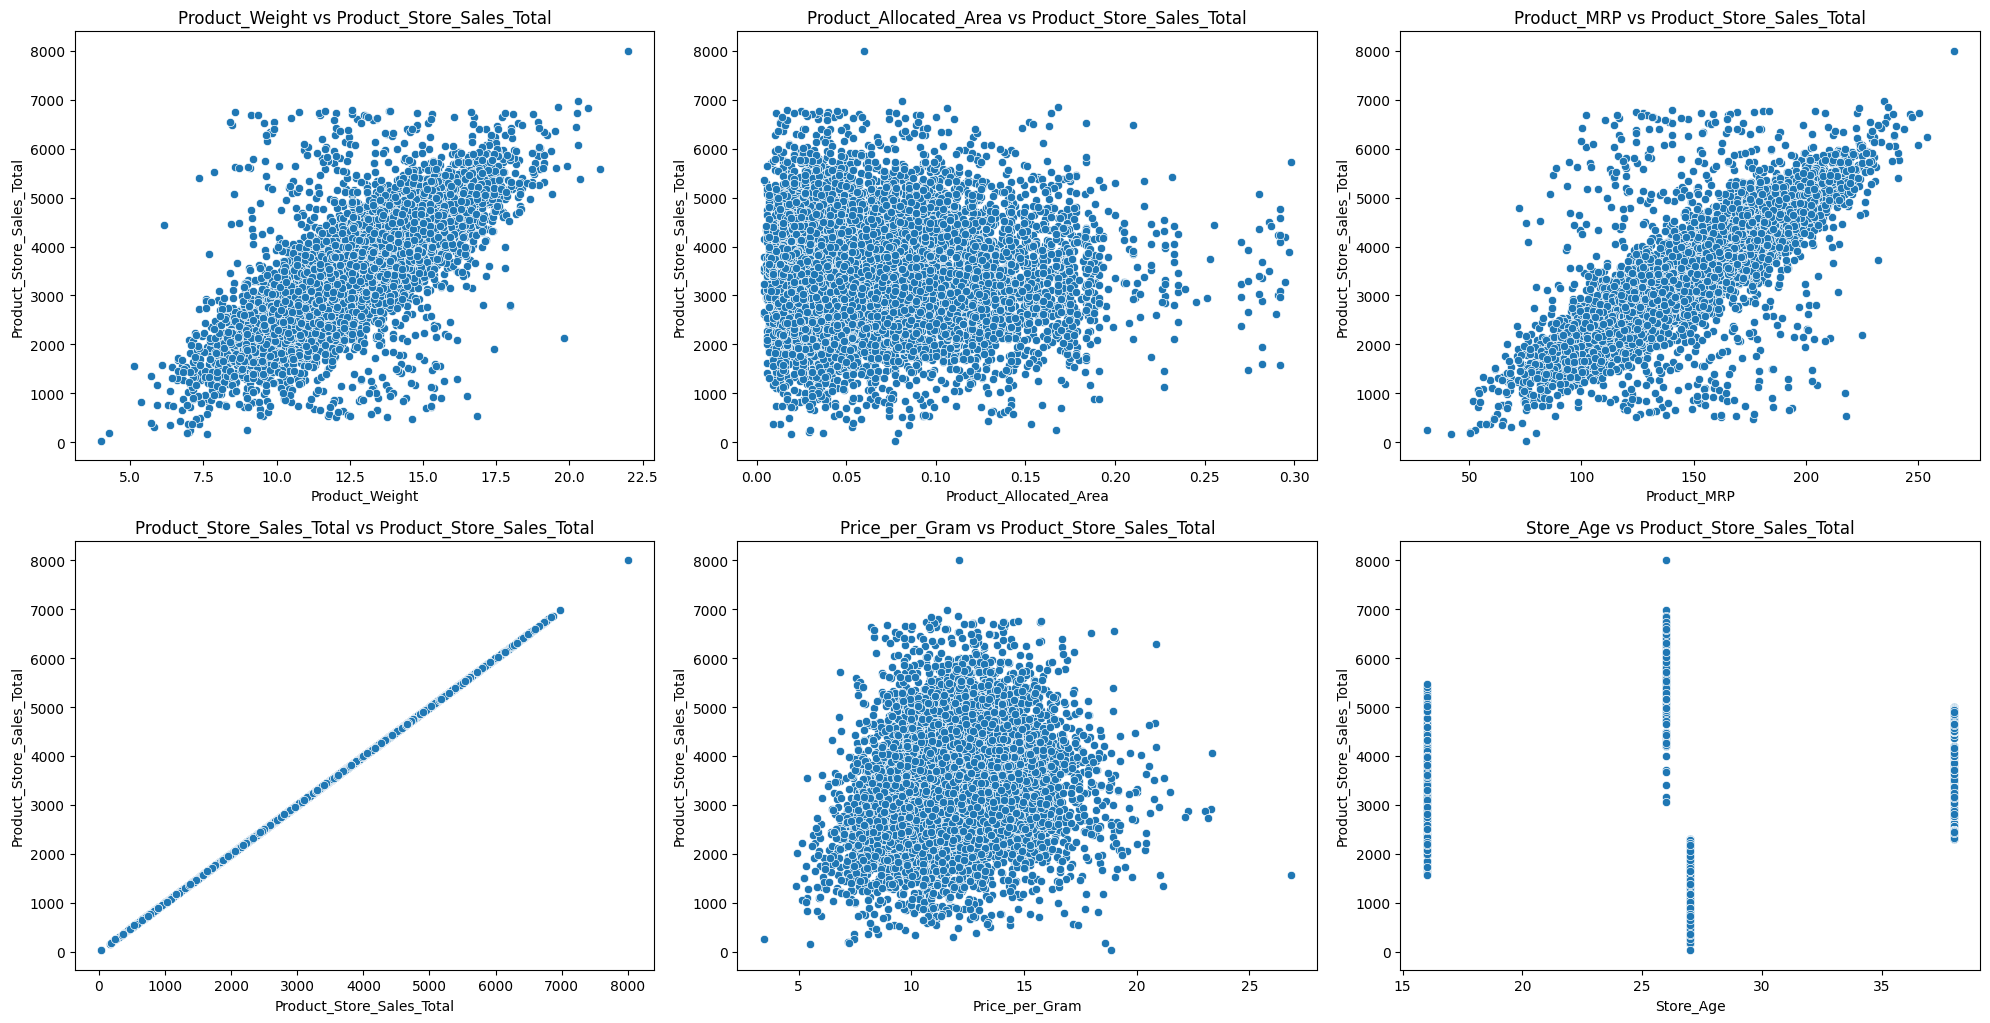

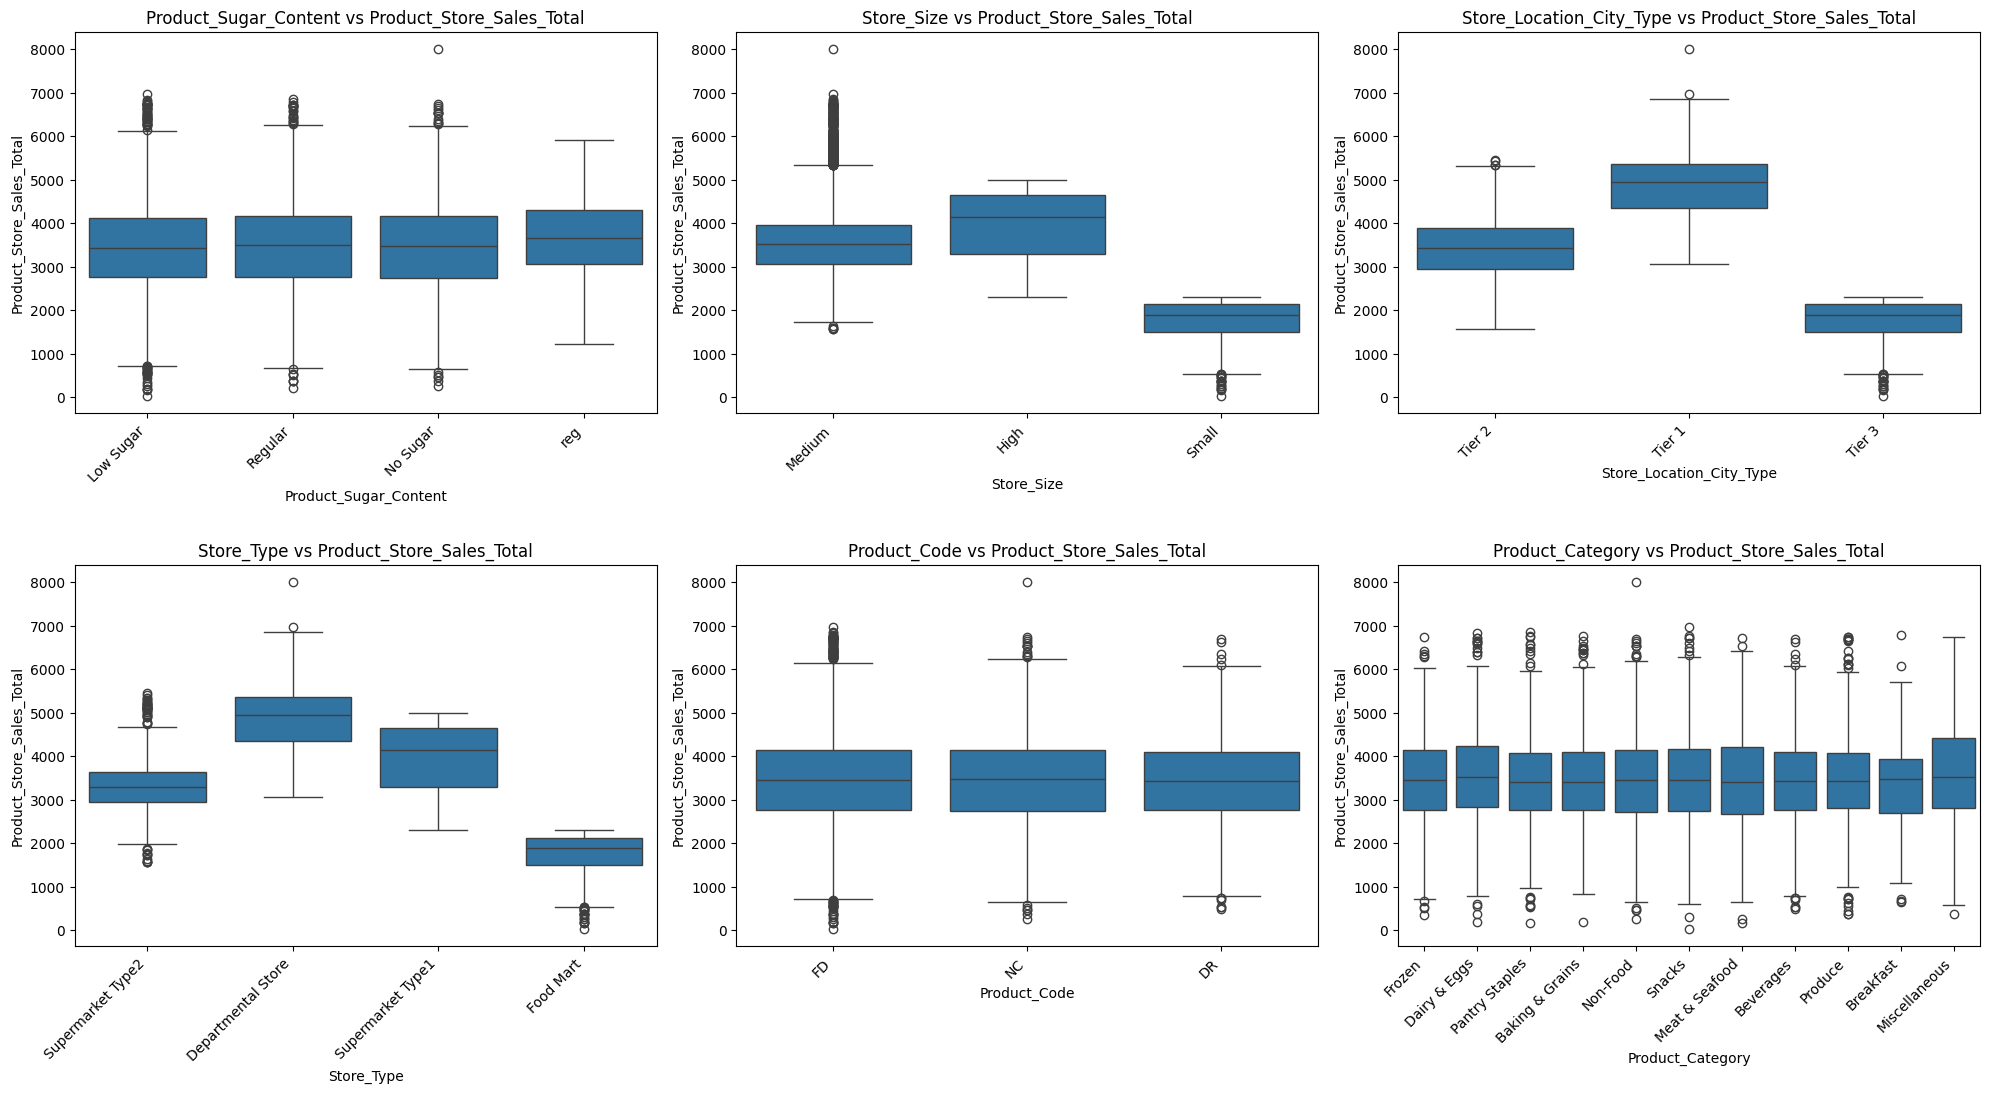

In [ ]:
# Plotting the relationship between numerical features and the target variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='Product_Store_Sales_Total')
    plt.title(f'{col} vs Product_Store_Sales_Total')
    plt.tight_layout()
plt.show()

# Plotting the relationship between categorical features and the target variable
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, y='Product_Store_Sales_Total')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{col} vs Product_Store_Sales_Total')
    plt.tight_layout()
plt.show()


# **Data Preprocessing**

In [ ]:
num_cols.remove('Product_Store_Sales_Total')

In [ ]:
# Define predictor matrix (X) using selected numeric and categorical features

X = df[num_cols + cat_cols]

# Define target variable
y = df['Product_Store_Sales_Total']

In [ ]:
# Split the dataset into training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y,              # Predictors (X) and target variable (y)
    test_size=0.2,     # 20% of the data is reserved for testing
    random_state=42    # Ensures reproducibility by setting a fixed random seed
)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Replace 'sparse' with 'sparse_output'
preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
)

In [ ]:
X.head()

,Product_Weight,Product_Allocated_Area,Product_MRP,Price_per_Gram,Store_Age,Product_Sugar_Content,Store_Size,Store_Location_City_Type,Store_Type,Product_Code,Product_Category
0,12.66,0.027,117.08,9.248025,16,Low Sugar,Medium,Tier 2,Supermarket Type2,FD,Frozen
1,16.54,0.144,171.43,10.364571,26,Low Sugar,Medium,Tier 1,Departmental Store,FD,Dairy & Eggs
2,14.28,0.031,162.08,11.350140,38,Regular,High,Tier 2,Supermarket Type1,FD,Pantry Staples
3,12.10,0.112,186.31,15.397521,38,Low Sugar,High,Tier 2,Supermarket Type1,FD,Baking & Grains
4,9.57,0.010,123.67,12.922675,27,No Sugar,Small,Tier 3,Food Mart,NC,Non-Food


# **Model Building**

## Define functions for Model Evaluation

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [ ]:
# Create a RandomForestRegressor model

rf_model = RandomForestRegressor(random_state=42)
rf_pipeline = make_pipeline(preprocessor, rf_model)

rf_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Price_per_Gram',
                                                   'Store_Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type', 'Product_Code',
                                                   'Product_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Evaluate the model
rf_perf_train = model_performance_regression(rf_pipeline, Xtrain, ytrain)
rf_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,106.645223,40.392924,0.989971,0.989955,0.015


In [ ]:
# Evaluate the model
rf_perf_test = model_performance_regression(rf_pipeline, Xtest, ytest)
rf_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,281.718747,107.508127,0.930443,0.930004,0.038604


## RF Hypertuning

In [ ]:
from sklearn import metrics

rf_tuned = RandomForestRegressor(random_state=42)
rf_pipeline_tuned = make_pipeline(preprocessor, rf_tuned)

rf_params = {
    'randomforestregressor__max_depth':[3, 4, 5, 6],
    'randomforestregressor__max_features': ['sqrt','log2',None],
    'randomforestregressor__n_estimators': [50, 75, 100, 125, 150]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_pipeline_tuned, rf_params, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(Xtrain, ytrain)

# Set the clf to the best combination of parameters
rf_pipeline_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_pipeline_tuned.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Price_per_Gram',
                                                   'Store_Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type', 'Product_Code',
                                                   'Product_Category'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features=None,
                                       n_estimators=150, random_state=42))])

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_pipeline_tuned, Xtrain,ytrain)
print("Training performance \n")
rf_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,293.38423,155.183718,0.924099,0.92398,0.055691


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_pipeline_tuned, Xtest,ytest)
print("Testing performance \n")
rf_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,315.712702,168.56914,0.912644,0.912092,0.059514


## XGBoost Regressor

In [ ]:
# Create and train the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

XGB_pipeline = make_pipeline(
    preprocessor,  # Preprocesses numerical and categorical features
    xgb_model      # XGBoost classifier for model training
)

In [ ]:
# Train the model pipeline on the training data
XGB_pipeline.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Price_per_Gram',
                                                   'Store_Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type', 'Pro...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(XGB_pipeline, Xtrain, ytrain)
print("Training performance \n")
xgb_estimator_model_train_perf

Training performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,124.916805,60.139315,0.98624,0.986219,0.020343


In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(XGB_pipeline, Xtest,ytest)
print("Testing performance \n")
xgb_estimator_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,305.682395,138.021393,0.918107,0.917589,0.050189


# **Model Performance Improvement - Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn import metrics

# Choose the type of regressor
xgb_tuned = XGBRegressor(random_state=42)

# Create pipeline with preprocessing and XGBoost model
xgb_pipeline = make_pipeline(preprocessor, xgb_tuned)

# Grid of parameters to sample from
param_distributions = {
    'xgbregressor__n_estimators': [50, 100, 150, 200],
    'xgbregressor__max_depth': [2, 3, 4],
    'xgbregressor__colsample_bytree': [0.4, 0.5, 0.6],
    'xgbregressor__colsample_bylevel': [0.4, 0.5, 0.6],
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1],
    'xgbregressor__reg_lambda': [0.4, 0.5, 0.6],
}

# Scorer based on R^2 score
scorer = metrics.make_scorer(metrics.r2_score)

# Run the randomized search
random_search = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_distributions,
    n_iter=20,  # number of parameter settings that are sampled
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the random search object
random_search.fit(Xtrain, ytrain)

# Retrieve the best estimator
xgb_tuned = random_search.best_estimator_

# Fit the best model to the training data
xgb_tuned.fit(Xtrain, ytrain)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Product_Weight',
                                                   'Product_Allocated_Area',
                                                   'Product_MRP',
                                                   'Price_per_Gram',
                                                   'Store_Age']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Product_Sugar_Content',
                                                   'Store_Size',
                                                   'Store_Location_City_Type',
                                                   'Store_Type', 'Pro...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=150, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, Xtrain, ytrain) # Use best_xgb_model instead of xgb_tuned
print("Testing performance \n")
xgb_tuned_model_train_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,266.477386,115.953423,0.937383,0.937285,0.043941


In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, Xtest, ytest) # Use best_xgb_model instead of xgb_tuned
print("Testing performance \n")
xgb_tuned_model_test_perf

Testing performance 



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,306.343447,135.826557,0.917752,0.917233,0.049573


# **Model Performance Comparison, Final Model Selection, and Serialization**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [rf_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,293.384230,293.384230,124.916805,266.477386
MAE,155.183718,155.183718,60.139315,115.953423
R-squared,0.924099,0.924099,0.986240,0.937383
Adj. R-squared,0.923980,0.923980,0.986219,0.937285
MAPE,0.055691,0.055691,0.020343,0.043941


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [rf_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest Estimator",
    "Random Forest Tuned",
    "XGBoost",
    "XGBoost Tuned"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Random Forest Estimator,Random Forest Tuned,XGBoost,XGBoost Tuned
RMSE,315.712702,315.712702,305.682395,306.343447
MAE,168.569140,168.569140,138.021393,135.826557
R-squared,0.912644,0.912644,0.918107,0.917752
Adj. R-squared,0.912092,0.912092,0.917589,0.917233
MAPE,0.059514,0.059514,0.050189,0.049573


#### XGBoost (Tuned) -- Best Overall
Lowest MAE (135.83) and MAPE (4.96%) → Most accurate.
High R² 0.9178 Explains 92% of sales variance.
Stable and consistent across all metrics.
Recommended for deployment if accuracy is the priority.
⚙️ 2. XGBoost (Base)
Slightly lower RMSE (305.68) than tuned version.
Still strong overall performance.
Could be a good fallback if tuning adds complexity.
🌲 3. Random Forest (Base & Tuned)
Higher errors (MAE 168.57, MAPE ~5.95%)
Lower R² (0.9126) → Less variance explained.
Tuning did not improve performance (same metrics as base).
May not be optimal unless interpretability or simpler models are required.

# **Deployment - Backend**

In [ ]:
# Create a folder for storing the files needed for backend app deployment
os.makedirs("backend_files", exist_ok=True)

In [ ]:
# Define the file path to save (serialize) the trained model along with the data preprocessing steps
saved_model_path = "backend_files/superkart_sales_prediction_model_v1_0.joblib"

In [ ]:
# Save the best trained model pipeline using joblib
joblib.dump(xgb_tuned, saved_model_path)

print(f"Model saved successfully at {saved_model_path}")

Model saved successfully at backend_files/superkart_sales_prediction_model_v1_0.joblib


In [ ]:
# Assuming your preprocessor is named 'preprocessor'
joblib.dump(preprocessor, "backend_files/superkart_preprocessor.joblib")
print("Preprocessor saved successfully.")

Preprocessor saved successfully.


In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login
from getpass import getpass

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
hf_token = getpass("Enter your Hugging Face token: ")
login(hf_token)

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

Enter your Hugging Face token: ··········


In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("deploy_backend_SKart",  # One can replace "RentalPricePredictionBackendDemo" with the desired space name
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create a Docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

Error creating repository: 409 Client Error: Conflict for url: https://huggingface.co/api/repos/create (Request ID: Root=1-6825a0ac-16c4323b1d430a895f4facc8;713c1233-7bec-4287-be39-96c7f18f9857)

You already created this space repo


### load saved model

## Flask Web Framework


In [ ]:
%%writefile backend_files/app.py
import numpy as np
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Initialize Flask app
superkart_sales_predictor_api = Flask("Product Store Sales Predictor")

# Load the trained product-store sales model
try:
    model = joblib.load("superkart_sales_prediction_model_v1_0.joblib")
    # Load the preprocessor
    preprocessor = joblib.load("superkart_preprocessor.joblib")
except FileNotFoundError:
    print("Error: 'best_model.joblib' or 'superkart_preprocessor.joblib' not found.")
    exit()
except Exception as e:
    print(f"Error loading model or preprocessor: {e}")
    exit()

# --- Feature Engineering Functions (Replicate your notebook logic) ---
def create_product_code(df):
    df['Product_Code'] = df['Product_Id'].str[:2]
    return df

def create_store_age(df):
    current_year = 2025  # Use the same reference year as in training
    df['Store_Age'] = current_year - df['Store_Establishment_Year']
    return df

def create_mrp_weight_ratio(df):
    df['MRP_Weight_Ratio'] = df['Product_MRP'] / df['Product_Weight']
    return df

def create_product_category(df):
    product_mapping = {'Frozen Foods': 'Frozen',
                       'Dairy': 'Dairy & Eggs',
                       'Canned': 'Pantry Staples',
                       'Baking Goods': 'Baking & Grains',
                       'Health and Hygiene': 'Non-Food',
                       'Snack Foods': 'Snacks',
                       'Meat': 'Meat & Seafood',
                       'Household': 'Non-Food',
                       'Hard Drinks': 'Beverages',
                       'Fruits and Vegetables': 'Produce',
                       'Breads': 'Baking & Grains',
                       'Soft Drinks': 'Beverages',
                       'Breakfast': 'Breakfast',
                       'Others': 'Miscellaneous',
                       'Starchy Foods': 'Pantry Staples',
                       'Seafood': 'Meat & Seafood'}
    df['Product_Category'] = df['Product_Type'].map(product_mapping)
    return df

# Add other feature engineering functions here

@superkart_sales_predictor_api.get('/')
def home():
    return "Welcome to the Product Store Sales Prediction API"

# Predict endpoint for a single product-store record
@superkart_sales_predictor_api.post('/predict')
def predict():
    data = request.get_json()

    try:
        # Convert input to DataFrame
        input_df = pd.DataFrame([data])

        # --- Apply Feature Engineering ---
        input_df = create_product_code(input_df)
        input_df = create_store_age(input_df)
        input_df = create_mrp_weight_ratio(input_df)
        input_df = create_product_category(input_df)
        # Apply other feature engineering functions

        # Print the expected features for debugging
        print("Preprocessor expected features:", preprocessor.feature_names_in_)  # Add this line

        # Ensure all necessary features (including engineered ones) are present
        required_features = list(preprocessor.feature_names_in_)
        if not all(feature in input_df.columns for feature in required_features):
            missing_features = [feature for feature in required_features if feature not in input_df.columns]
            return jsonify({'error': f'Missing required features (after engineering) in input: {missing_features}'}), 400

        # --- Apply Preprocessing ---
        processed_input = preprocessor.transform(input_df)

        # Make prediction using the processed input
        prediction = model.predict(processed_input).tolist()[0]

        return jsonify({'Predicted_Sales': prediction})

    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Run server
if __name__ == '__main__':
    superkart_sales_predictor_api.run(debug=True)

Overwriting backend_files/app.py


## Dependencies File

In [ ]:
%%writefile backend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
streamlit==1.43.2
flask-cors==3.0.10
xgboost==2.1.4  # Add this line

Overwriting backend_files/requirements.txt


## Dockerfile

In [ ]:
%%writefile backend_files/Dockerfile
FROM python:3.9-slim

WORKDIR /app

# Copy requirements file first for better caching

COPY . .


# Install dependencies
RUN pip install --no-cache-dir --upgrade pip \
 && pip install --no-cache-dir -r requirements.txt \
 && echo "Installed packages:" \
 && pip list

# Expose port
EXPOSE 7860

# Start app with Gunicorn
CMD ["gunicorn", "--bind", "0.0.0.0:7860", "app:superkart_sales_predictor_api"]

Overwriting backend_files/Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [ ]:
# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi
from getpass import getpass


repo_id = "abhilashmanchala/deploy_backend_SKart"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
hf_token = getpass("Enter your Hugging Face token: ")
login(hf_token)

Enter your Hugging Face token: ··········


## Uploading Files to Hugging Face Space (Docker Space)

In [ ]:
# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/backend_files",  # Local folder path in azureml
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/abhilashmanchala/deploy_backend_SKart/commit/a49a0752760f06d09faf79c804b220e9009e9a60', commit_message='Upload folder using huggingface_hub', commit_description='', oid='a49a0752760f06d09faf79c804b220e9009e9a60', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/abhilashmanchala/deploy_backend_SKart', endpoint='https://huggingface.co', repo_type='space', repo_id='abhilashmanchala/deploy_backend_SKart'), pr_revision=None, pr_num=None)

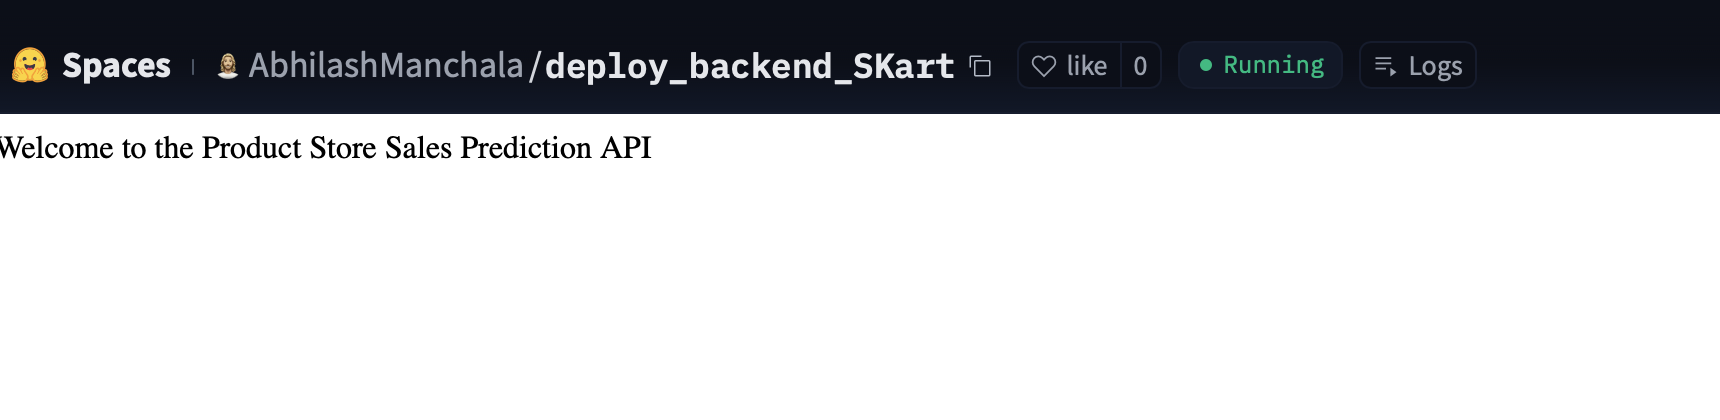

### Checking response

In [ ]:
import json  # To handle JSON formatting for API requests and responses
import requests  # To send HTTP requests to the deployed Flask API

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations

from sklearn.model_selection import train_test_split  # To split data for batch inference scenarios

In [95]:
import requests
import json

space_url = "https://abhilashmanchala-deploy-backend-skart.hf.space"
predict_url = f"{space_url}/predict"

payload = {
    "Product_Weight": 12.66,
    "Product_Allocated_Area": 0.027,
    "Product_MRP": 117.08,
    "Price_per_Gram": 9.2480252764613,  # Engineered
    "Store_Age": 16,  # Engineered (assuming current_year=2025 and Store_Establishment_Year=2009)
    "Product_Sugar_Content": "Low Sugar",
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 2",
    "Store_Type": "Supermarket Type2",
    "Product_Code": "FD",  # Engineered (from Product_Id "FD...")
    "Product_Category": "Frozen"  # Engineered (from Product_Type "Frozen Foods")
}

headers = {'Content-Type': 'application/json'}

try:
    response = requests.post(predict_url, headers=headers, data=json.dumps(payload))
    response.raise_for_status()

    prediction = response.json()
    print("Prediction Response:", prediction)

except requests.exceptions.RequestException as e:
    print(f"Error sending request: {e}")
except json.JSONDecodeError:
    print("Error decoding JSON response")

Error sending request: 500 Server Error: INTERNAL SERVER ERROR for url: https://abhilashmanchala-deploy-backend-skart.hf.space/predict


we have successfully deployed

# **Deployment - Frontend**

In [ ]:
# Import the login function from the huggingface_hub library
from huggingface_hub import login
from getpass import getpass

# Login to your Hugging Face account using your access token
# Replace "YOUR_HUGGINGFACE_TOKEN" with your actual token
hf_token = getpass("Enter your Hugging Face token: ")
login(hf_token)

# Import the create_repo function from the huggingface_hub library
from huggingface_hub import create_repo

Enter your Hugging Face token: ··········


In [ ]:
# Try to create the repository for the Hugging Face Space
try:
    create_repo("deploy_frontend_SKart",  # One can replace "RentalPricePredictionBackendDemo" with the desired space name
        repo_type="space",  # Specify the repository type as "space"
        space_sdk="docker",  # Specify the space SDK as "docker" to create a Docker space
        private=False  # Set to True if you want the space to be private
    )
except Exception as e:
    # Handle potential errors during repository creation
    if "RepositoryAlreadyExistsError" in str(e):
        print("Repository already exists. Skipping creation.")
    else:
        print(f"Error creating repository: {e}")

## Streamlit for Interactive UI

In [ ]:
# Create a folder for storing the files needed for frontend UI deployment
os.makedirs("frontend_files", exist_ok=True)

In [ ]:
%%writefile frontend_files/Dockerfile
# Use Python base image
FROM python:3.10-slim

# Set working directory
WORKDIR /app

# Copy all files into the container
COPY . /app

# Install dependencies
RUN pip install --upgrade pip && \
    pip install -r requirements.txt

# Expose port for Streamlit
EXPOSE 7860

# Run Streamlit app
CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0"]

Overwriting frontend_files/Dockerfile


In [ ]:
%%writefile frontend_files/app.py
import streamlit as st
import requests
import json

# Streamlit UI for Product-Store Sales Prediction
st.title("Product Store Sales Prediction App")
st.subheader("Predict the total sales of a product in a given store using its attributes.")

# Collect input from user
Product_Id = st.text_input("Product ID (e.g., FD1234)")
Product_Weight = st.number_input("Product Weight (kg)", min_value=0.0, value=5.0)
Product_Sugar_Content = st.selectbox("Sugar Content", ["Low", "Regular", "No Sugar", "reg"])
Product_Allocated_Area = st.number_input("Allocated Display Area Ratio", min_value=0.0, max_value=1.0, value=0.1)
Product_Type = st.selectbox("Product Type", ["Meat", "Snack Foods", "Dairy", "Canned", "Soft Drinks", "Fruits and Vegetables", "Household", "Seafood", "Others"])
Product_MRP = st.number_input("Product MRP", min_value=0.0, value=100.0)
Store_Id = st.text_input("Store ID (e.g., STR001)")
Store_Establishment_Year = st.number_input("Store Establishment Year", min_value=1950, max_value=2025, value=2005)
Store_Size = st.selectbox("Store Size", ["Low", "Medium", "High"])
Store_Location_City_Type = st.selectbox("City Type", ["Tier 1", "Tier 2", "Tier 3"])
Store_Type = st.selectbox("Store Type", ["Departmental Store", "Supermarket Type 1", "Supermarket Type 2", "Food Mart"])

# Prepare input dictionary
input_data = {
    "Product_Id": Product_Id,
    "Product_Weight": Product_Weight,
    "Product_Sugar_Content": Product_Sugar_Content,
    "Product_Allocated_Area": Product_Allocated_Area,
    "Product_Type": Product_Type,
    "Product_MRP": Product_MRP,
    "Store_Id": Store_Id,
    "Store_Establishment_Year": Store_Establishment_Year,
    "Store_Size": Store_Size,
    "Store_Location_City_Type": Store_Location_City_Type,
    "Store_Type": Store_Type,
}

# Prediction trigger
if st.button("Predict"):
    try:
        response = requests.post(
            "https://abhilashmanchala-deploy_backend_SKart.hf.space/v1/predict",
            json=input_data,  # Pass the dictionary directly
        )
        if response.status_code == 200:
            try:
                response_json = response.json()
                st.write("Backend Response (JSON):", response_json)
                prediction = response_json.get("Predicted_Sales", "No prediction returned")
                st.success(f"Predicted Sales: ${prediction}")
            except json.JSONDecodeError:
                st.error("Error: Backend returned invalid JSON")
                st.text(response.text)
        else:
            st.error("Error making prediction. Status Code: {response.status_code}")
            st.text(response.text)
    except Exception as e:
        st.error(f"Exception occurred: {type(e)}, {e}")


Overwriting frontend_files/app.py


## Dependencies File

In [ ]:
%%writefile frontend_files/requirements.txt
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
joblib==1.4.2
Werkzeug==2.2.2
flask==2.2.2
gunicorn==20.1.0
requests==2.28.1
streamlit==1.43.2

Overwriting frontend_files/requirements.txt


## Setting up a HuggingFace Streamlit Space for the Frontend

In [ ]:
repo_id = "abhilashmanchala/deploy_frontend_SKart"  # Your Hugging Face space id

# Login to Hugging Face platform with the access token
hf_token = getpass("Enter your Hugging Face token: ")
login(hf_token)

Enter your Hugging Face token: ··········


## Uploading Files to Hugging Face Space (Streamlit Space)

In [ ]:
# Initialize the API
api = HfApi()

# Upload Streamlit app files stored in the folder called deployment_files
api.upload_folder(
    folder_path="/content/frontend_files",  # Local folder path in azureml
    repo_id=repo_id,  # Hugging face space id
    repo_type="space",  # Hugging face repo type "space"
)

CommitInfo(commit_url='https://huggingface.co/spaces/abhilashmanchala/deploy_frontend_SKart/commit/f0e8223002041a92184cd9978ba1868e1659d6dc', commit_message='Upload folder using huggingface_hub', commit_description='', oid='f0e8223002041a92184cd9978ba1868e1659d6dc', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/abhilashmanchala/deploy_frontend_SKart', endpoint='https://huggingface.co', repo_type='space', repo_id='abhilashmanchala/deploy_frontend_SKart'), pr_revision=None, pr_num=None)

model frontend deployed successfully

# **Actionable Insights and Business Recommendations**

-

-